<a href="https://colab.research.google.com/github/HwangHanJae/ml-definitive-guide-pratice/blob/main/classification/smote_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 분류 실습 - 캐글 신용카드 사기 검출
## Kaggle Credit Card Fraud Detection

In [1]:
import pandas as pd
data_path = "/content/drive/MyDrive/Colab Notebooks/DataScience/Data/credit_card_fraud_detection/creditcard.csv"
data = pd.read_csv(data_path)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
print(data["Class"].value_counts())
print("Class의 비율 : ")
zero = data.loc[data["Class"] == 0]["Class"].count() / data["Class"].count()
one = data.loc[data["Class"] == 1]["Class"].count() / data["Class"].count()
print("0 : ",round(zero, 4))
print("1 : ",round(one, 4))

0    284315
1       492
Name: Class, dtype: int64
Class의 비율 : 
0 :  0.9983
1 :  0.0017


클래스 데이터의 비율이 0은 99.83% 1은 0.17% 정도로 극도로 불균형한 분포를 가진다.  
이는 신용카드 사기와 같은 현상들은 전체 데이터에서 차지하는 비중이 매울 적을 수 밖에 없기 때문에 나타나는 현상이다.

## 언더 샘플링과 오버 샘플링
###UnderSampling And OverSampling

위의 신용카드 데이터 처럼 레이블이 불균형한 데이터 세트를 학습시키면 예측 성능의 문제가 발생할 수 있다.  
이것은 **이상 레이블을 가지는 데이터 건수가 정상 레이블을 가진 데이터 건수에 비해 너무 적기 때문에 발생**한다.
- 이상 레이블의 건수는 너무 적고, 정상 레이블을 건수는 매우 많기 때문이다.
- 이렇게 되면 일방적으로 정상 레이블로 치우친 학습을 수행해 제대로 된 이상 데이터 검출이 어려워지기 쉽다.

이러한 불균형 레이블 값 분포로 인한 문제점을 해결하기 위하여 대표적으로 오버 샘플링(OverSampling)과 언더샘플링(UnderSampling) 방법을 사용한다.

### 오버샘플링(OverSampling)
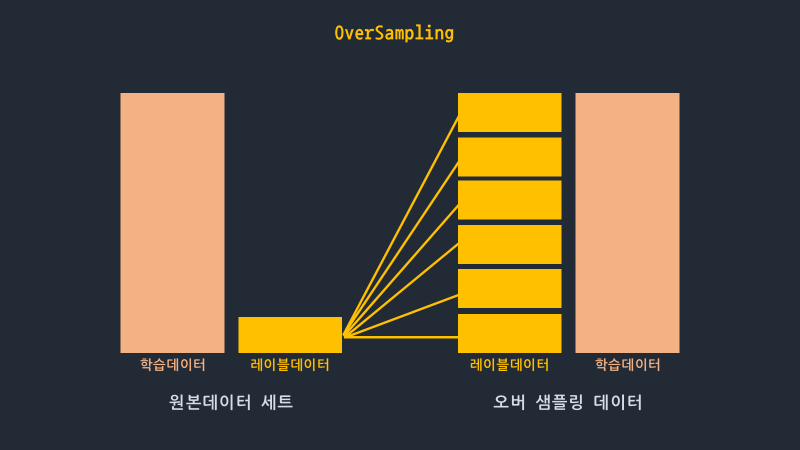

####적은 레이블을 가진 데이터세트를 많은 레이블을 가진 데이터 세트 수준으로 증식  
####동일한 데이터를 단순히 증식하는 방법은 과적합이 되기 떄문에 의미가 없으므로 원본 데이터의 피처값들을 아주 약간만 변경하여 증식
- 대표적으로 SMOTE 방법이 있음


####SMOTE
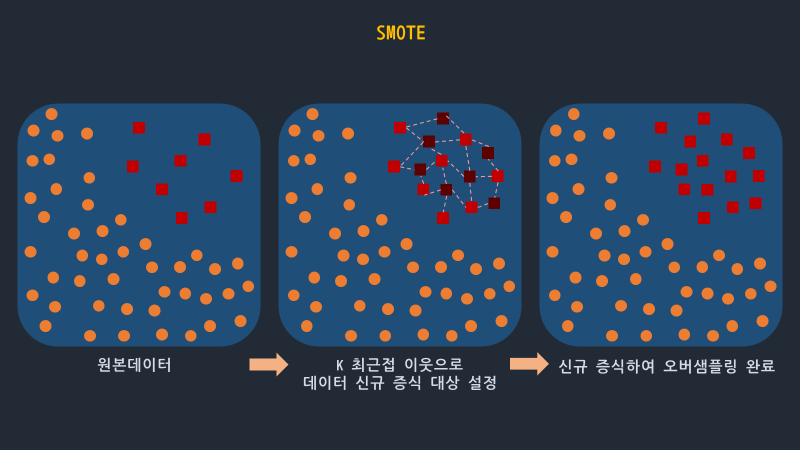

SMOTE 방법은 적은 데이터 세트에 있는 개별 데이터들의 K 최근접 이웃을 찾아서  
이 데이터와 k개 이웃들의 차이를 일정 값으로 만들어서 기존 데이터와 약간 차이가 나는 새로운 데이터를 생성하는 방식

### 언더샘플링(UnderSampling)
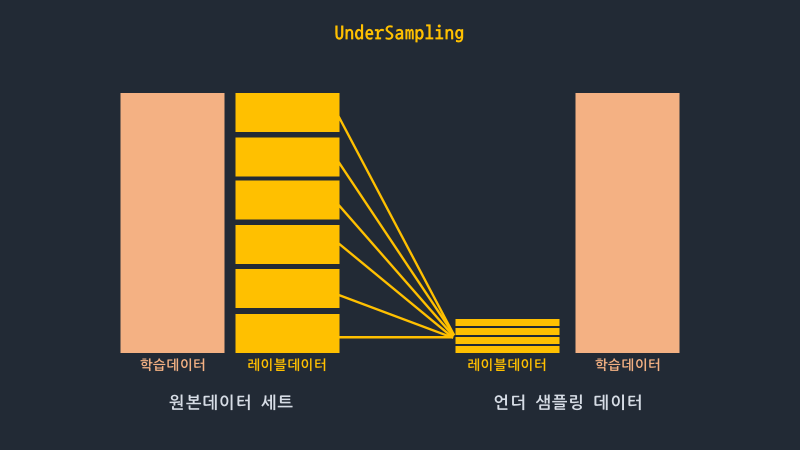

#### 많은 레이블을 가진 데이터 세트를 적은 레이블을 가진 데이터 세트 수준으로 감소
#### 즉 정상 레이블을 가진 데이터가 10000건, 이상 레이블을 가진 데이터가 100건이 있으면 정상레이블 데이터를 100건으로 줄여버리는 방식
#### 너무 많은 정상 레이블 데이터를 감소시키기 때문에 정상 레이블의 경우 오히려 제대로 된 학습을 수행할수 없다는 단점이 있어 잘 적용하지 않음


## 데이터 일차 가공 및 모델 학습/예측 평가

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(data_path)
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

info()를 확인해보면 총 데이터는 284807개 이며 Null값은 존재하지 않으며,  
float64 타입은 30개, int64 타입은 1개(레이블)로 모두 숫자형이다.

In [14]:
from sklearn.model_selection import train_test_split

#인자로 입력 받은 DataFrame을 복사한뒤 Time 칼러만 삭제하고 복사된 DataFrame 반환
def get_preprocessed_df(df=None):
  df_copy = df.copy()
  df_copy.drop("Time", axis=1,inplace=True)
  return df_copy

#사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수
def get_train_test_dataset(df=None):
  #인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
  df_copy = get_preprocessed_df(df)

  X = df_copy.drop("Class", axis=1)
  y = df_copy["Class"]

  #stratify= y로 학습데이터와 테스트 데이터 세트의 레이블 값 분포도를 동일하게 만듬
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, stratify = y, random_state = 0)
  return X_train, X_test, y_train, y_test

불필요한 칼럼을 제거하고, 데이터 사전 가공 작업을 할 함수를 만들고 적용

In [18]:
X_train, X_test, y_train, y_test = get_train_test_dataset(df)

print("학습 데이터 레이블 값 비율 : ")
print(y_train.value_counts() / y_train.shape[0] * 100)
print("테스트 데이터 레이블 값 비율 : ")
print(y_test.value_counts() / y_test.shape[0]* 100)

학습 데이터 레이블 값 비율 : 
0    99.827451
1     0.172549
Name: Class, dtype: float64
테스트 데이터 레이블 값 비율 : 
0    99.826785
1     0.173215
Name: Class, dtype: float64


위에서 생성한 학습/테스트 데이터 세트의 레이블 값 비율을 확인해보니  
0.172(학습), 0.173(테스트)으로 잘 분할되었음

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score,precision_score,recall_score,roc_auc_score

def get_clf_eval(y_test, pred):
  print("오차행렬")
  matrix = confusion_matrix(y_test, pred)
  print(matrix)
  accuracy = round(accuracy_score(y_test, pred),4)
  precision = round(precision_score(y_test, pred),4)
  recall = round(recall_score(y_test, pred),4)
  f1 = round(f1_score(y_test, pred),4)
  auc = round(f1_score(y_test, pred),4)
  print(f"정확도 : {accuracy}, 정밀도 : {precision}, 재현율 : {recall}, F1 : {f1}, AUC : {auc}")

In [21]:
#로지스틱 회귀, LightGBM을 사용하여 확인
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

lr = LogisticRegression()
light = LGBMClassifier(boost_from_average=False)

models = [lr, light]
for model in models:
  print(model.__class__.__name__)
  model.fit(X_train, y_train)
  predict = model.predict(X_test)
  get_clf_eval(y_test, predict)

LogisticRegression
오차행렬
[[85280    15]
 [   55    93]]
정확도 : 0.9992, 정밀도 : 0.8611, 재현율 : 0.6284, F1 : 0.7266, AUC : 0.7266
LGBMClassifier
오차행렬
[[85289     6]
 [   39   109]]
정확도 : 0.9995, 정밀도 : 0.9478, 재현율 : 0.7365, F1 : 0.8289, AUC : 0.8289


lightgbm의 경우 버젼업이 되면서 불균형 데이터에 대하여 boost_from_average = True로 되어 있기 때문에 False로 변경하여 진행해 줘야함

재현율 lightgbm의 경우 0.7365로 로지스틱회귀(0.6284)보다 높고  
AUC 또한 0.8289로 0.7266보다 높은 결과를 보여준다.

In [26]:
#모델을 학습하고 평가까지 한번에 진행해줄 함수를 생성
def get_model_train_eval(model, X_train = None, X_test = None, y_train = None, y_test = None):
  print(f"### {model.__class__.__name__} ###")
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  get_clf_eval(y_test, pred)

In [23]:
#lightgbm을 파라미터 설정을 한후 위의 함수를 사용하겠음

model = LGBMClassifier(n_estimators=1000, num_leaves=64,n_jobs=-1,boost_from_average=False)
get_model_train_eval(model, X_train, X_test, y_train, y_test)

오차행렬
[[85289     6]
 [   36   112]]
정확도 : 0.9995, 정밀도 : 0.9492, 재현율 : 0.7568, F1 : 0.8421, AUC : 0.8421


## 데이터 분포도 변환 후 모델 학습/예측 평가

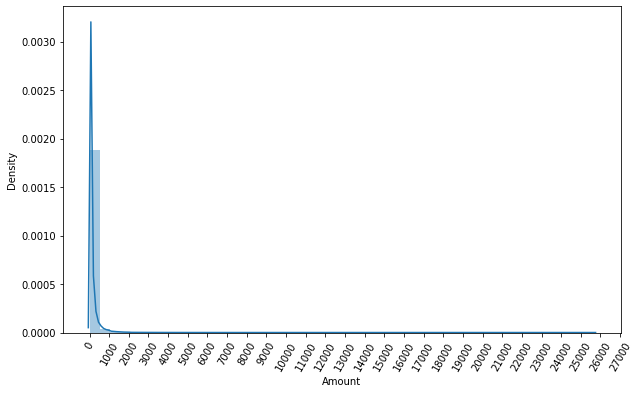

In [24]:
#Amount 칼럼의 분포도 확인
import seaborn as sns
plt.figure(figsize=(10, 6))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.distplot(df["Amount"])

로지스틱 회귀는 선형모델로 대부분의 선형모델은 중요 피처들의 값이 정규 분포 형태를 유지하는 것을 선호한다.

현재 Amount 칼럼은 정규분포를 형태를 보이지는 않고 오른쪽으로 꼬리가긴 분포를 가지고 있다.

In [28]:
#StandardScaler를 사용하여 정규분포의 모양을 만들어줌
from sklearn.preprocessing import StandardScaler
#StandardScaler를 사용하여 정규분포를 만들어주는 로직을 추가함
def get_preprocessed_df(df=None):
  df_copy = df.copy()
  scaler = StandardScaler()
  scaled_amount = scaler.fit_transform(df["Amount"].values.reshape(-1,1))
  #변환된 Amount 칼럼을 "Amount_Scaled"로 피처명을 변경후에 DataFrame의 맨 앞 칼럼으로 입력
  df_copy.insert(0, "Amount_Scaled", scaled_amount)
  df_copy.drop(["Time", "Amount"], axis=1,inplace=True)
  return df_copy

In [29]:
#Amount를 정규 분포 형태로 변환 후 로지스틱 회귀, LightGBM 수행
X_train, X_test, y_train, y_test = get_train_test_dataset(df)

lr = LogisticRegression()
get_model_train_eval(lr, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

light = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(light, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

### LogisticRegression ###
오차행렬
[[85282    13]
 [   56    92]]
정확도 : 0.9992, 정밀도 : 0.8762, 재현율 : 0.6216, F1 : 0.7273, AUC : 0.7273
### LGBMClassifier ###
오차행렬
[[85290     5]
 [   35   113]]
정확도 : 0.9995, 정밀도 : 0.9576, 재현율 : 0.7635, F1 : 0.8496, AUC : 0.8496


두 모델 모두 성능이 크게 개선되지는 않았음

In [31]:
#StandardScaler 대신 로그 변환을 수행
def get_preprocessed_df(df=None):
  df_copy = df.copy()
  
  scaled_amount = np.log1p(df_copy["Amount"])
  #변환된 Amount 칼럼을 "Amount_Scaled"로 피처명을 변경후에 DataFrame의 맨 앞 칼럼으로 입력
  df_copy.insert(0, "Amount_Scaled", scaled_amount)
  df_copy.drop(["Time", "Amount"], axis=1,inplace=True)
  return df_copy

In [32]:
X_train, X_test, y_train, y_test = get_train_test_dataset(df)

lr = LogisticRegression()
get_model_train_eval(lr, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

light = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(light, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

### LogisticRegression ###
오차행렬
[[85283    12]
 [   59    89]]
정확도 : 0.9992, 정밀도 : 0.8812, 재현율 : 0.6014, F1 : 0.7149, AUC : 0.7149
### LGBMClassifier ###
오차행렬
[[85290     5]
 [   35   113]]
정확도 : 0.9995, 정밀도 : 0.9576, 재현율 : 0.7635, F1 : 0.8496, AUC : 0.8496


두 모델 모두 성능이 크게 좋아지지는 않았고, 약간 성능이 좋아졌음

## 이상치 데이터 제거 후 모델 학습/예측 평가

### 이상치(Outlier)
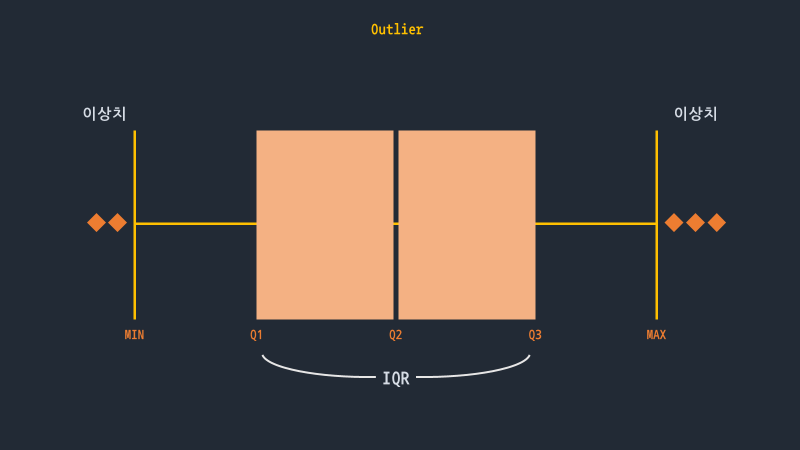



이상치(Outlier) : 전체 데이터의 패턴에서 벗어난 이상 값을 가진 데이터
이상치를 찾는방법 : IQR(Inter Queantile Range) 방식
- Q1(1/4 분위수) : 25%의 데이터가 이 값보다 작다.
- Q2(2/4 분위수) : 중앙값(median)으로 50%의 데이터가 이 값보다 큼(또는 작음)
- Q3(3/4 분위수) : 25%의 데이터가 이 값보다 큼(75%의 데이터가 이 값보다 작음)
- MIN(최솟값) : Q1에서 1.5 * IQR을 뺀 지점
- MAX(최댓값) : Q3에서 1.5 * IQR을 더한 지점
- 이상치(Ourlier) : 최솟값이하 혹은 최댓값 이상
  - 이상치 <= Q1 - (1.5 * IQR) , Q3 + (1.5 * IQR) <= 이상치
- IQR : Q1에서 Q3의 범위 
  - Q3 - Q1

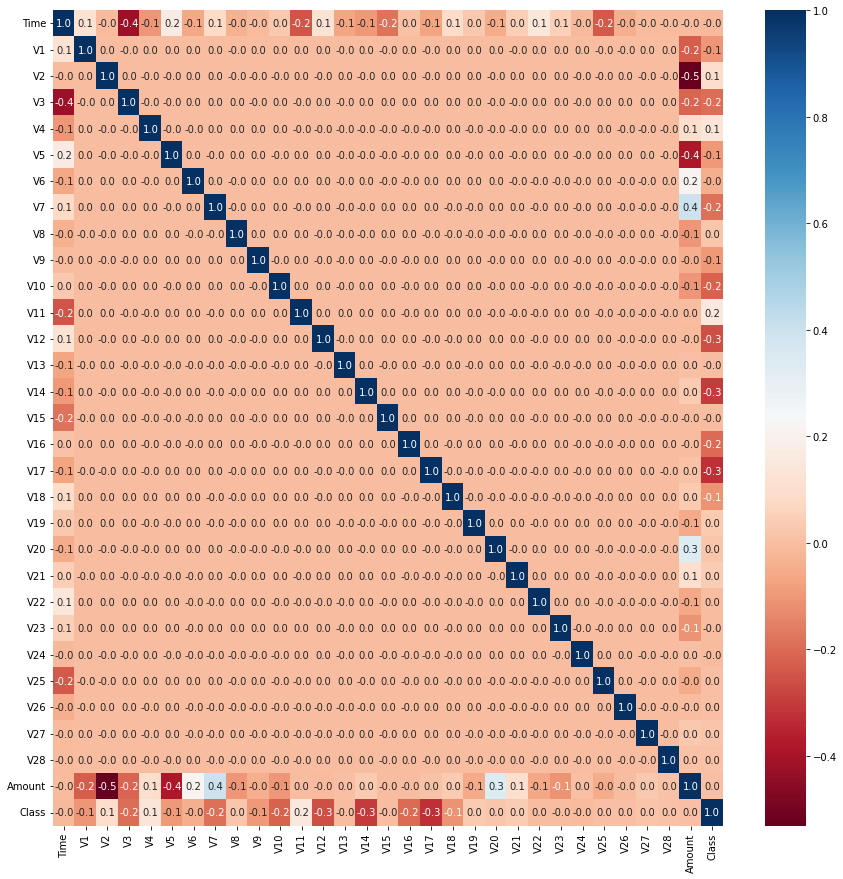

In [42]:
#heatmap을 그려 상관성이 높은 피처를 찾아냄
plt.figure(figsize=(15,15))
corr = df.corr()
#cmap = 'RdBu'는 양의 상관이 높을수록 진한파랑, 음의 상관이 높을수록 진한빨강으로 표현
sns.heatmap(corr, cmap='RdBu',fmt=".1f", annot =True)

Class 피처와 상관관계가 높은 피처는 V12, V14, V17로 음의 상관이 높게 나타났다.

In [47]:
# 이상치를 찾아내는 함수를 작성
def get_outlier(df=None, column=None, weight=1.5):
  #fraud에 해당하는 column 데이터만 추출
  fraud = df[df["Class"]==1][column]

  #np.percentile로 Q1, Q3를 구함
  q1 = np.percentile(fraud.values, 25)
  q3 = np.percentile(fraud.values, 75)

  #IQR을 구하고 최댓값 최솟값 지점을 구함
  iqr = q3-q1
  low = q1 - (iqr * weight)
  high = q3 + (iqr * weight)

  #최댓값 보다 크거나, 최솟값보다 작은 이상치 데이터를 설정하고 DataFrame index 반환
  outlier_index = fraud[(fraud < low) | (fraud > high)].index
  return outlier_index

In [49]:
v14_outlier = get_outlier(df, "V14")
print("이상치 데이터 인덱스 : ", v14_outlier)

이상치 데이터 인덱스 :  Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [50]:
def get_preprocessed_df(df=None):
  df_copy = df.copy()
  
  scaled_amount = np.log1p(df_copy["Amount"])
  #변환된 Amount 칼럼을 "Amount_Scaled"로 피처명을 변경후에 DataFrame의 맨 앞 칼럼으로 입력
  df_copy.insert(0, "Amount_Scaled", scaled_amount)
  df_copy.drop(["Time", "Amount"], axis=1,inplace=True)

  #이상치를 제거하는 로직 추가
  oulier_index = get_outlier(df=df_copy, column = "V14", weight=1.5)
  df_copy.drop(oulier_index, axis=0, inplace=True)
  return df_copy

In [51]:
X_train, X_test, y_train, y_test = get_train_test_dataset(df)

lr = LogisticRegression()
get_model_train_eval(lr, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

light = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(light, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

### LogisticRegression ###
오차행렬
[[85281    14]
 [   48    98]]
정확도 : 0.9993, 정밀도 : 0.875, 재현율 : 0.6712, F1 : 0.7597, AUC : 0.7597
### LGBMClassifier ###
오차행렬
[[85291     4]
 [   25   121]]
정확도 : 0.9997, 정밀도 : 0.968, 재현율 : 0.8288, F1 : 0.893, AUC : 0.893


이상치를 제거하고 로지스틱 회귀과 LightGBM 두 모델다 성능이 크게 향상이 되었음

## SMOTE 오버 샘플링 적용 후 모델 학습/예측 평가

### SMOTE 오버 샘플링을 적용할시에는 반드시 학습데이터에만 적용해야 한다.

In [56]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print("SMOTE 적용 전 학습용 피처/레이블 데이터 세트 : ", X_train.shape, y_train.shape)
print("SMOTE 적용 후 학습용 피처/레이블 데이터 세트 : ", X_train_over.shape, y_train_over.shape)

print("SMOTE 적용 후 레이블 값 분포 : \n", pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트 :  (199362, 29) (199362,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트 :  (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포 : 
 1    199020
0    199020
Name: Class, dtype: int64


In [58]:
def get_smote(X_train=None, y_train=None):
  smote = SMOTE(random_state=0)
  X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
  return X_train_over,y_train_over

SMOTE 전에는 199362개의 데이터지만 SMOTE 적용 후에는 398040 데이터로 증식하였음  
SMOTE 적용 후에 레이블 값 분포를 보았을때 분포가 동일한 것을 확인할 수 있음

In [59]:
X_train, X_test, y_train, y_test = get_train_test_dataset(df)
X_train_over, y_train_over = get_smote(X_train=X_train, y_train=y_train)
lr = LogisticRegression()
#SMOTE 적용 전
print("SMOTE 적용 전")
get_model_train_eval(lr, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
print("SMOTE 적용 후")
get_model_train_eval(lr, X_train=X_train_over, X_test=X_test, y_train=y_train_over, y_test=y_test)
print()
light = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
print("SMOTE 적용 전")
get_model_train_eval(light, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
print("SMOTE 적용 후")
get_model_train_eval(light, X_train=X_train_over, X_test=X_test, y_train=y_train_over, y_test=y_test)

SMOTE 적용 전
### LogisticRegression ###
오차행렬
[[85281    14]
 [   48    98]]
정확도 : 0.9993, 정밀도 : 0.875, 재현율 : 0.6712, F1 : 0.7597, AUC : 0.7597
SMOTE 적용 후
### LogisticRegression ###
오차행렬
[[82937  2358]
 [   11   135]]
정확도 : 0.9723, 정밀도 : 0.0542, 재현율 : 0.9247, F1 : 0.1023, AUC : 0.1023

SMOTE 적용 전
### LGBMClassifier ###
오차행렬
[[85291     4]
 [   25   121]]
정확도 : 0.9997, 정밀도 : 0.968, 재현율 : 0.8288, F1 : 0.893, AUC : 0.893
SMOTE 적용 후
### LGBMClassifier ###
오차행렬
[[85286     9]
 [   22   124]]
정확도 : 0.9996, 정밀도 : 0.9323, 재현율 : 0.8493, F1 : 0.8889, AUC : 0.8889


로지스틱 회귀 같은 경우에 SMOTE 적용을 하면 재현율이 급격하게 상승(0.67 -> 0.92)하는 것을 볼 수 있으나  
정밀도가 급격하게 저하(0.87 -> 0.05)되었음  
재현율이 아무리 높더라도, 정밀도가 낮으면 업무에 적용할 수 없음  
로지스틱 회귀 모델이 오버 샘플링으로 인해 실제 원본 데이터의 유형보다  
너무나 많은 Class =1 e데이터를 학습하면서 실제 테스트 데이터 세트에서 예측을 지나치게 Class = 1로 적용해 정밀도가 급격하게 떨어지게 되었음

lightgbm 모델 또한 재현율은 올라갔지만 정밀도가 떨어진것을 볼 수 있다.  
하지만 SMOTE를 적용하면 일반적으로 정밀도가 낮아진다.

**좋은 SMOTE를 만들어 재현율 증가율은 높이면서 정밀도 감소율을 낮출 수 있도록 해야한다.**

In [66]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
def precision_recall_curve_plot(y_test, pred_proba_c1):
  #threshold, ndarray와 이 thershold에 따른 정밀도, 재현율 ndarray 추출
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

  #X축을 thershold값으로 Y축은 정밀도, 재현율 값으로 각각 Plot을 수행, 정밀도는 점선으로 표시
  plt.figure(figsize=(8,6))
  threshold_boundary = thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label="precision")
  plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

  #thershold값 X축의 Scale을 0.1단위로 변경
  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1),2))

  #X축, Y축 label과 legend, 그리고 grid 설정
  plt.xlabel("Threshold value")
  plt.ylabel("Precision and Recall value")
  plt.legend()
  plt.grid()
  plt.show()

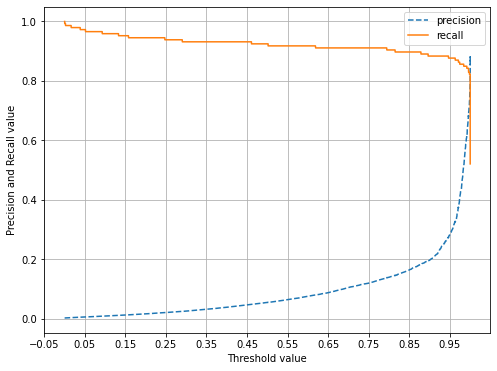

In [67]:
precision_recall_curve_plot(y_test, lr.predict_proba(X_test)[:,1])

임계값이 0.99이하에서는 재현율이 매우 좋고, 정밀도가 극단적으로 낮다가  
0.99 이상에서는 반대로 재현율이 떨어지고 정밀도가 높아집니다.

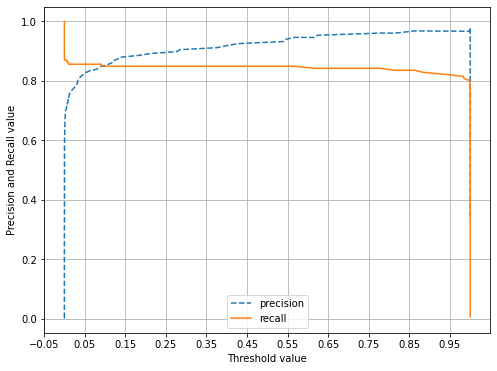

In [68]:
precision_recall_curve_plot(y_test, light.predict_proba(X_test)[:,1])

임계값이 0.1정도에서 부터 재현율은 서서히 떨어지고, 정밀도가 서서히 높아지는 것을 볼 수있다.  
또한 0.99에서는 두 지표다 급격하게 떨어진다.